In [36]:
#读取MNIST数据
## 在conda python环境中，tensorflow 1.15可能没有examples文件
##在\Lib\site-packages\tensorflow\文件夹下没有examples文件
##就在tensroflow_core文件中复制examples
from tensorflow.examples.tutorials.mnist import input_data

mnist_data_folder = "../../data/MNIST_data/"
data = input_data.read_data_sets(mnist_data_folder, one_hot=False)

Extracting ../../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [37]:
#划分数据集
##准备训练数据，验证数据，测试数据
X0 = data.train.images
Y0 = data.train.labels
X1 = data.validation.images
Y1 = data.validation.labels
X2 = data.test.images
Y2 = data.test.labels

In [38]:
# 提取样本量
N0 = X0.shape[0]
N1 = X1.shape[0]
N2 = X2.shape[0]

X0 = X0.reshape(N0, 28, 28, 1) / 255
X1 = X1.reshape(N1, 28, 28, 1) / 255
X2 = X2.reshape(N2, 28, 28, 1) / 255
#彩色为三
# X0 = X0.reshape(N0,28,28,3)/255

<Figure size 432x288 with 0 Axes>

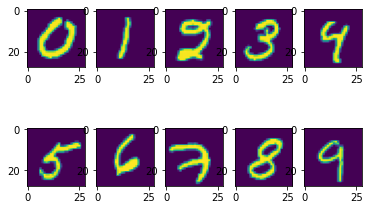

In [39]:
# 手写数字展示
from matplotlib import pyplot as plt

plt.figure()
fig, ax = plt.subplots(2, 5)
ax = ax.flatten()
for i in range(10):
    Im = X0[Y0 == i][0].reshape(28, 28)
    ax[i].imshow(Im)
plt.show()

In [40]:
#产生one_hot型因变量
print(Y0)
from keras.utils import to_categorical

YY0 = to_categorical(Y0)
YY1 = to_categorical(Y1)
YY2 = to_categorical(Y2)

[7 3 4 ... 5 6 8]


In [41]:
#NeLet-5构建模型
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten
from keras import Model

## 搭建网络
input_layer = Input([28, 28, 1])
x = Conv2D(6, [5, 5], padding='same', activation='relu')(input_layer)
#x =MaxPooling2D((2,2))(x)
x = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(x)
#第二个卷积层
x = Conv2D(16, [5, 5], padding='valid', activation='relu')(x)
#池化
x = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(x)
#拉伸成一位矩阵
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
output_layer = x

model = Model(input_layer, output_layer)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               4812

In [42]:
#模型训练
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=["accuracy"])
history = model.fit(X0, YY0, validation_data=(X1, YY1),
                    batch_size=100,
                    epochs=20)

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 3s 62us/step - loss: 0.9383 - accuracy: 0.6854 - val_loss: 0.3593 - val_accuracy: 0.8940
Epoch 2/20
55000/55000 [==============================] - 3s 55us/step - loss: 0.3016 - accuracy: 0.9074 - val_loss: 0.2173 - val_accuracy: 0.9360
Epoch 3/20
55000/55000 [==============================] - 3s 62us/step - loss: 0.1973 - accuracy: 0.9390 - val_loss: 0.1502 - val_accuracy: 0.9576
Epoch 4/20
55000/55000 [==============================] - 3s 54us/step - loss: 0.1472 - accuracy: 0.9544 - val_loss: 0.1172 - val_accuracy: 0.9654
Epoch 5/20
55000/55000 [==============================] - 4s 74us/step - loss: 0.1211 - accuracy: 0.9630 - val_loss: 0.0968 - val_accuracy: 0.9692
Epoch 6/20
55000/55000 [==============================] - 3s 60us/step - loss: 0.1021 - accuracy: 0.9681 - val_loss: 0.0951 - val_accuracy: 0.9716
Epoch 7/20
55000/55000 [==============================] - 3s 56us/ste

In [43]:
#模型评估
results = model.evaluate(X2, YY2)
results

10000/10000 [==============================] - 1s 60us/step


[0.04551001806797576, 0.984000027179718]